# 0. Load Python Modules

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load My Data

In [49]:
df = pd.read_csv('test_data.csv', index_col=0, parse_dates=True)
print(df.head())
print(df.dtypes)


         date day_of_week  month  is_holiday  capacity  temperature_max  meals
0  2024-01-02     Tuesday      1       False     327.0              9.4  207.0
1  2024-01-03   Wednesday      1       False     186.0             10.7  112.0
2  2024-01-04    Thursday      1       False     386.0              8.4  252.0
3  2024-01-05      Friday      1       False     227.0              8.9  127.0
4  2024-01-08      Monday      1       False     284.0             -1.2  192.0
date                object
day_of_week         object
month                int64
is_holiday            bool
capacity           float64
temperature_max    float64
meals              float64
dtype: object


/var/folders/pf/1ybbd9b9627_s6prdj0dd5sh0000gn/T/ipykernel_1524/2758942650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('test_data.csv', index_col=0, parse_dates=True)


# 2. Explore the Data

In [50]:
#Display the dimensions of the dataset
print("Dataset dimensions:", df.shape)

#View information about the columns#
#print(df.info())

#basic statistical details about the dataset
print(df.describe())

#Check for missing values in the dataset
print("Missing values in each column:\n", df.isnull().sum())

Dataset dimensions: (462, 7)
            month    capacity  temperature_max       meals
count  462.000000  462.000000       462.000000  462.000000
mean     6.073593  276.634199        16.305628  172.484848
std      3.253397   68.017338         8.070619   44.781499
min      1.000000  151.000000        -1.200000   77.000000
25%      3.000000  218.500000        10.200000  136.250000
50%      6.000000  266.000000        16.000000  168.000000
75%      9.000000  339.750000        22.600000  204.000000
max     12.000000  398.000000        37.800000  286.000000
Missing values in each column:
 date               0
day_of_week        0
month              0
is_holiday         0
capacity           0
temperature_max    0
meals              0
dtype: int64


# 3. One Hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

In [52]:
ohetransform = ohe.fit_transform(df[['day_of_week']])


In [53]:
#concatenate ohetransform with original df and drop day of week, date and month as those won't be necessary for the training

df = pd.concat([df, ohetransform],axis=1).drop(['day_of_week','month', 'date', 'is_holiday'], axis=1)
df.head()

,capacity,temperature_max,meals,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,327.0,9.4,207.0,0.0,0.0,0.0,1.0,0.0
1,186.0,10.7,112.0,0.0,0.0,0.0,0.0,1.0
2,386.0,8.4,252.0,0.0,0.0,1.0,0.0,0.0
3,227.0,8.9,127.0,1.0,0.0,0.0,0.0,0.0
4,284.0,-1.2,192.0,0.0,1.0,0.0,0.0,0.0


# 4. Visualize Data

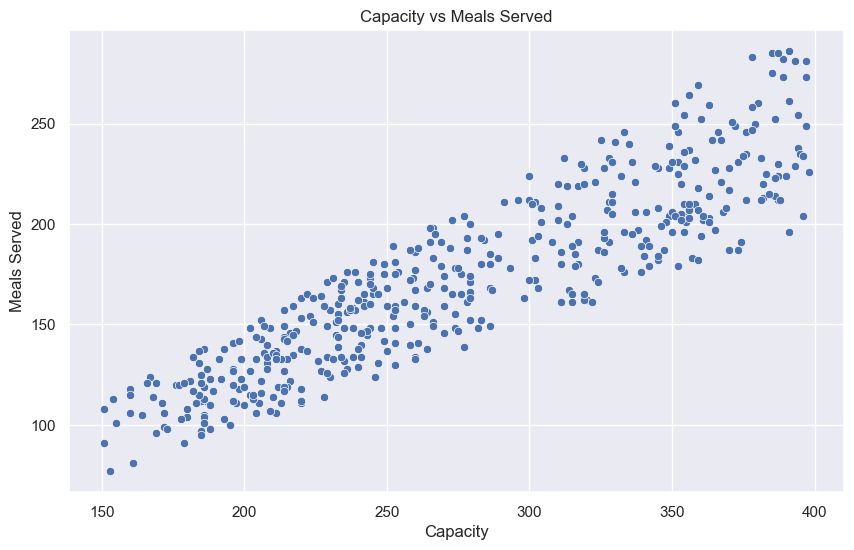

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='capacity', y='meals')
plt.title('Capacity vs Meals Served')
plt.xlabel('Capacity')
plt.ylabel('Meals Served')
plt.show()

# 5. Split Data 

In [55]:
## import function to split the dataset
from sklearn.model_selection import train_test_split


In [56]:
#split the dataset into features and target variable
X = df.drop('meals', axis=1)
y = df['meals']    
##view the x and y variables
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())
 

Features (X):
    capacity  temperature_max  day_of_week_Friday  day_of_week_Monday  \
0     327.0              9.4                 0.0                 0.0   
1     186.0             10.7                 0.0                 0.0   
2     386.0              8.4                 0.0                 0.0   
3     227.0              8.9                 1.0                 0.0   
4     284.0             -1.2                 0.0                 1.0   

   day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  
0                   0.0                  1.0                    0.0  
1                   0.0                  0.0                    1.0  
2                   1.0                  0.0                    0.0  
3                   0.0                  0.0                    0.0  
4                   0.0                  0.0                    0.0  
Target (y):
 0    207.0
1    112.0
2    252.0
3    127.0
4    192.0
Name: meals, dtype: float64


In [57]:
##view the x and y variables
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())

Features (X):
    capacity  temperature_max  day_of_week_Friday  day_of_week_Monday  \
0     327.0              9.4                 0.0                 0.0   
1     186.0             10.7                 0.0                 0.0   
2     386.0              8.4                 0.0                 0.0   
3     227.0              8.9                 1.0                 0.0   
4     284.0             -1.2                 0.0                 1.0   

   day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  
0                   0.0                  1.0                    0.0  
1                   0.0                  0.0                    1.0  
2                   1.0                  0.0                    0.0  
3                   0.0                  0.0                    0.0  
4                   0.0                  0.0                    0.0  
Target (y):
 0    207.0
1    112.0
2    252.0
3    127.0
4    192.0
Name: meals, dtype: float64


In [58]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)    
print("Training set size:", X_train.shape) 
print("Testing set size:", X_test.shape)      

Training set size: (369, 7)
Testing set size: (93, 7)


# 7. Model our Data with Linear Regression

In [ ]:
## import the Linear Regression model
from sklearn.linear_model import LinearRegression   
# create an instance of the model
lr = LinearRegression()
lr.fit(X_train, y_train)  # fit the model to the training data
lr.score(X_train, y_train)  # evaluate the model on the training data


/Users/sandragrassl/01 Projects/KüchenKompass/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sandragrassl/01 Projects/KüchenKompass/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sandragrassl/01 Projects/KüchenKompass/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.8106779499254109

In [60]:
lr.score(X_test, y_test)  # evaluate the model on the testing data

0.8248658971230473

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
y_pred = lr.predict(X_test) # make predictions on the testing data
mean_absolute_error(y_test, y_pred) # absolute difference between actual and predicted meals

16.27448390742629

In [63]:
mean_squared_error(y_test, y_pred) # average squared difference between actual and predicted meals

372.67970118590773